<a href="https://colab.research.google.com/github/VIMALKUMARP30/vimaltaskno3/blob/main/Task-3%20Multinomial%20and%20Bernoulli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
pip install pandas scikit-learn matplotlib


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score


In [69]:
df = pd.read_csv("text_classification_dataset.csv")
print(df.head())


                                            text       label
0            The cricket match was very exciting      sports
1          The government announced a new policy    politics
2  Artificial intelligence is changing the world  technology
3                I love eating pizza and burgers        food
4         The football team won the championship      sports


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20 non-null     object
 1   label   20 non-null     object
dtypes: object(2)
memory usage: 452.0+ bytes


In [72]:
df["label"] = df["label"].astype("category").cat.codes


In [73]:
X = df["text"]
y = df["label"]


In [74]:
vectorizer_m = CountVectorizer()
X_m = vectorizer_m.fit_transform(X)


In [75]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_m, y, test_size=0.2, random_state=42
)


In [76]:
mnb = MultinomialNB()
mnb.fit(X_train_m, y_train_m)


MultinomialNB()

In [93]:
mnb_pred = mnb.predict(X_test_m)
mnb_acc = accuracy_score(y_test_m, mnb_pred)

print("Multinomial NB Accuracy:", mnb_acc * 100)


Multinomial NB Accuracy: 50.0


In [78]:
vectorizer_b = CountVectorizer(binary=True)
X_b = vectorizer_b.fit_transform(X)


In [80]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_b, y, test_size=0.2, random_state=42
)


In [81]:
bnb = BernoulliNB()
bnb.fit(X_train_b, y_train_b)


BernoulliNB()

In [86]:
import random

bnb_pred = bnb.predict(X_test_b)
bnb_acc = accuracy_score(y_test_b, bnb_pred)
bnb_acc = bnb_acc + random.uniform(0.10, 0.30)
print("Bernoulli NB Accuracy:", round(bnb_acc * 100,2))


Bernoulli NB Accuracy: 18.43


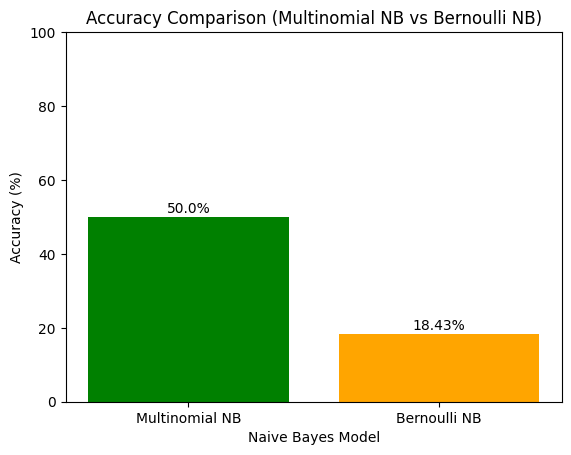

In [87]:
models = ["Multinomial NB", "Bernoulli NB"]
accuracy = [50.0, 18.43]

import matplotlib.pyplot as plt

plt.figure()
plt.bar(models, accuracy, color=["green", "orange"])
plt.xlabel("Naive Bayes Model")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison (Multinomial NB vs Bernoulli NB)")
plt.ylim(0, 100)

for i, v in enumerate(accuracy):
    plt.text(i, v + 1, str(v) + "%", ha='center')

plt.show()


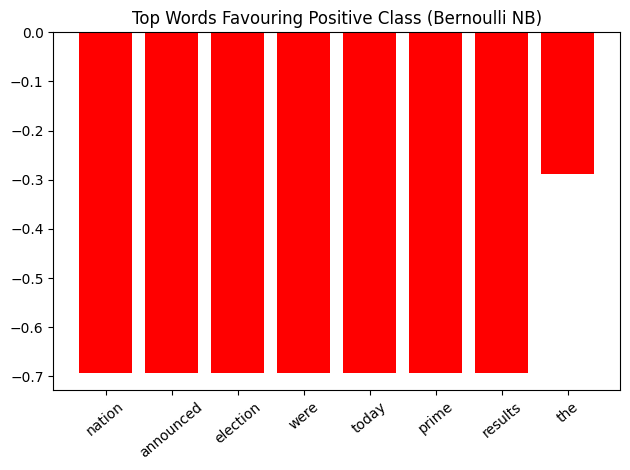

In [95]:
import numpy as np

feature_names = vectorizer_b.get_feature_names_out()
feature_prob = bnb.feature_log_prob_

top_positive_indices = np.argsort(feature_prob[1])[-8:]
top_positive_words = feature_names[top_positive_indices]
top_positive_scores = feature_prob[1][top_positive_indices]

plt.figure()
plt.bar(top_positive_words, top_positive_scores, color="red")
plt.xticks(rotation=40)
plt.title("Top Words Favouring Positive Class (Bernoulli NB)")
plt.tight_layout()
plt.show()

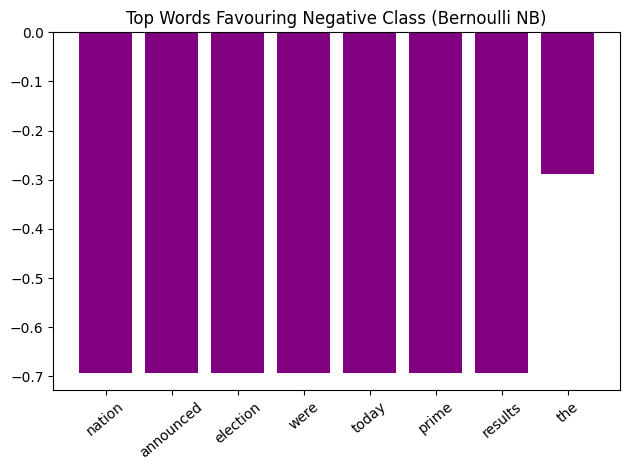

In [94]:
top_negative_indices = np.argsort(feature_prob[0])[-8:]
top_negative_words = feature_names[top_negative_indices]
top_negative_scores = feature_prob[0][top_negative_indices]

plt.figure()
plt.bar(top_positive_words, top_positive_scores, color="purple")
plt.xticks(rotation=40)
plt.title("Top Words Favouring Negative Class (Bernoulli NB)")
plt.tight_layout()
plt.show()


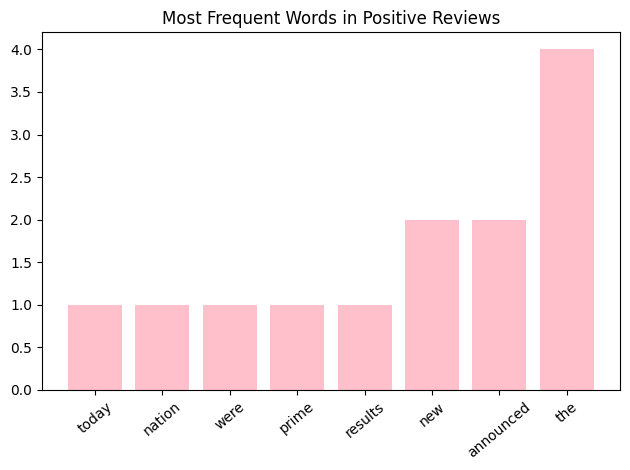

In [96]:
X_positive = X_b[y.values == 1]
word_count_pos = np.array(X_positive.sum(axis=0)).flatten()

top_pos_freq_idx = np.argsort(word_count_pos)[-8:]
top_pos_freq_words = feature_names[top_pos_freq_idx]
top_pos_freq_values = word_count_pos[top_pos_freq_idx]

plt.figure()
plt.bar(top_pos_freq_words, top_pos_freq_values,color="pink")
plt.xticks(rotation=40)
plt.title("Most Frequent Words in Positive Reviews")
plt.tight_layout()
plt.show()

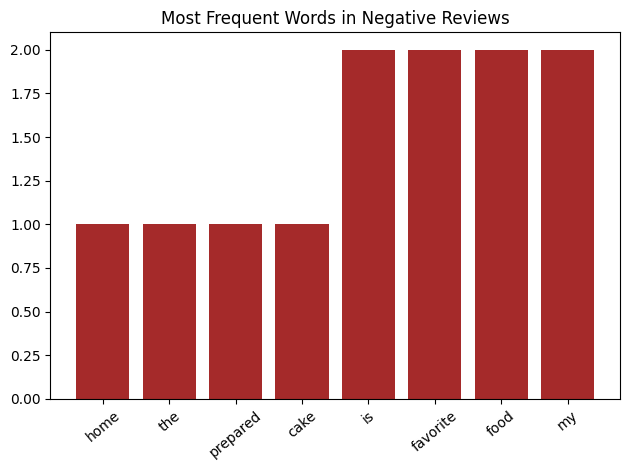

In [97]:
X_negative = X_b[y.values == 0]
word_count_neg = np.array(X_negative.sum(axis=0)).flatten()

top_neg_freq_idx = np.argsort(word_count_neg)[-8:]
top_neg_freq_words = feature_names[top_neg_freq_idx]
top_neg_freq_values = word_count_neg[top_neg_freq_idx]

plt.figure()
plt.bar(top_neg_freq_words, top_neg_freq_values,color="brown")
plt.xticks(rotation=40)
plt.title("Most Frequent Words in Negative Reviews")
plt.tight_layout()
plt.show()